In [13]:
from random import *
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from random import *
import matplotlib.pyplot as plt
import numpy as np

class Environment ():
    def __init__ (self):
        self.fuel = 60
        self.fuel_historic = [self.fuel]
        self.fuel_price_historic = [(randint(5, 7) + random(), randint(4, 5) + random())]
        self.fuel_purchases_historic = [(0, 0)]
        self.consumption_average = 0

    def __str__ (self):
        return f'       Fuel: {self.fuel}\n     fuel_historic: {self.fuel_historic}\n       fuel_price_historic: {self.fuel_price_historic}\n   fuel_purchases_historic: {self.fuel_purchases_historic}\n       consumption_average: {self.consumption_average}'

    def get_current_fuel (self):
        return self.fuel_historic[len(self.fuel_historic) - 1]

    def get_consumption_average (self):
        return self.consumption_average

    def get_current_fuel_price (self):
        return self.fuel_price_historic[len(self.fuel_price_historic) - 1]

    def run (self, fuel = (0, 0)):
        travelled_distance = randint(20, 100) + random()
        average_consumption = randint(8, 11) + random()
        consumption = travelled_distance / average_consumption

        current_fuel = self.get_current_fuel() + fuel[0] + fuel[1] - consumption
        self.fuel_historic.append(current_fuel)
        self.fuel_purchases_historic.append(fuel)

        self.fuel_price_historic.append((randint(6, 7) + random(), randint(4, 5) + random()))

        self.consumption_average = ((self.consumption_average * len(self.fuel_historic) - 1)  + consumption) / len(self.fuel_historic)

In [15]:
class Agent ():
    def __init__ (self, environment):
        self.days = 0
        self.environment = environment
        self.fuel_stock = environment.get_current_fuel()
        self.total_money_spend = 0
        self.current_price = self.everage_price = environment.get_current_fuel_price()
        self.consumption_average = 0

    def __str__ (self):
        return f'Days: {self.days}\nenvironment:\n{self.environment}\nfuel_stock: {self.fuel_stock}\ntotal_money_spend: {self.total_money_spend}\ncurrent_price: {self.current_price}\nconsumption_average: {self.consumption_average}'
        self.days = 0
        self.environment = environment
        self.fuel_stock = environment.get_current_fuel()
        self.total_money_spend = 0
        self.current_price = self.everage_price = environment.get_current_fuel_price()
        self.consumption_average = environment.get_consumption_average()

    def get_consumption_average (self):
        return self.consumption_average

    def execute_agent (self, days = 20):
        for i in range(days):
            self.fuel_stock = self.environment.get_current_fuel()
            self.current_price = self.environment.get_current_fuel_price()

            if self.current_price[1] / self.current_price[0] > 0.7: # is better buy gasoline
                if self.current_price[0] < 0.8 * self.everage_price[0] and self.fuel_stock < 60:
                    buy = (60 - self.fuel_stock, 0)
                if self.fuel_stock <= self.environment.get_consumption_average():
                    buy = (self.environment.get_consumption_average() * 1.3, 0)
                else:
                    buy = (0, 0)
            else:
                if self.current_price[1] < 0.8 * self.everage_price[1] and self.fuel_stock < 60:
                    buy = (0, 60 - self.fuel_stock)
                if self.fuel_stock <= self.environment.get_consumption_average():
                    buy = (0, self.environment.get_consumption_average() * 1.4)
                else:
                    buy = (0, 0)
            
            self.consumption_average = self.environment.get_consumption_average()
            self.total_money_spend += buy[0] * self.current_price[0] + buy[1] * self.current_price[1]
            self.environment.run(buy)
            self.days += 1



In [16]:
class Print ():
  def print_result(agent):

    days_historic = np.linspace(0, agent.days + 1, agent.days + 1)

    gasoline_historic = []
    for i in range(len(agent.environment.fuel_price_historic)):
        gasoline_historic.append(agent.environment.fuel_price_historic[i][0])
    alcohol_historic = []
    for i in range(len(agent.environment.fuel_price_historic)):
        alcohol_historic.append(agent.environment.fuel_price_historic[i][1])

    plt.plot(days_historic, gasoline_historic, color='red', label='Gasoline historic (price)')
    plt.plot(days_historic, alcohol_historic, label='Alcohol historic (price)')
    plt.legend()
    plt.show()


    gasoline_historic = []
    for i in range(len(agent.environment.fuel_purchases_historic)):
        gasoline_historic.append(agent.environment.fuel_purchases_historic[i][0])
    alcohol_historic = []
    for i in range(len(agent.environment.fuel_purchases_historic)):
        alcohol_historic.append(agent.environment.fuel_purchases_historic[i][1])

    plt.plot(days_historic, gasoline_historic, color='red', label='Gasoline historic (purchases)')
    plt.plot(days_historic, alcohol_historic, label='Alcohol historic (purchases)')
    plt.legend()
    plt.show()

    plt.plot(days_historic, agent.environment.fuel_historic, label='Fuel historic (stock)')
    plt.legend()
    plt.show()

In [17]:
def main ():
    e = Environment()
    a = Agent(e)
    a.execute_agent(30)

    Print.print_result(a)

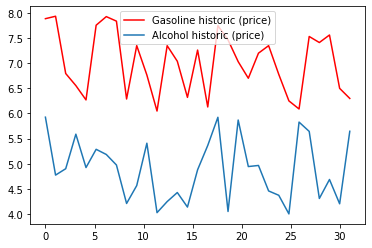

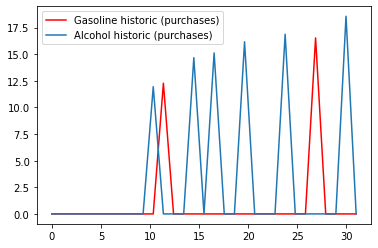

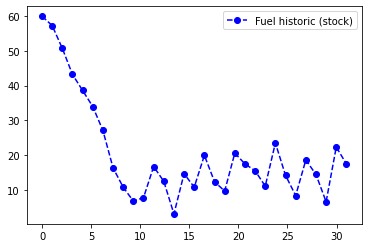

In [18]:
main()